In [20]:
# importing pandas
import pandas as pd
# importing numpy
import numpy as np
# importing numpy
import matplotlib.pyplot as plt
print("Imports done successfully.")

Imports done successfully.


In [37]:
# Read Text Files with Pandas using read_csv()
  
# read text file into pandas DataFrame
df = pd.read_csv("~/project_files/prism-modelling-l4/shut-the-box-game/stb_rmin.sta", sep="\s+|:\(|,|\(|\)|:", engine="python", usecols = [i for i in range(1,12)])

# get_array
stb_sta = df.values

# upload transition file into numpy array
stb_tra = np.loadtxt("stb_rmin.tra", delimiter=" ", skiprows=1, dtype={'names': ('state_number', 'sth', 'transition_state', 'probability','action'),
'formats': ('i4','i4','i4','f4','S3')})

print(df)

states = np.loadtxt("stb_rmin.tra", delimiter=" ", skiprows=1, usecols=(0,2), dtype=int)
trans_prblty = np.loadtxt("stb_rmin.tra", delimiter=" ", skiprows=1, usecols=3, dtype=float)
actions = np.loadtxt("stb_rmin.tra", delimiter=" ", skiprows=1, usecols=4, dtype=str)

      s  sum  p1  p2  p3  p4  p5  p6  p7  p8  p9
0     0    0   0   0   0   0   0   0   0   0   0
1     0    0   0   0   0   0   0   0   0   0   1
2     0    0   0   0   0   0   0   0   0   1   0
3     0    0   0   0   0   0   0   0   0   1   1
4     0    0   0   0   0   0   0   0   1   0   0
...  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..
6590  2    0   1   1   1   1   1   1   0   1   1
6591  2    0   1   1   1   1   1   1   1   0   0
6592  2    0   1   1   1   1   1   1   1   0   1
6593  2    0   1   1   1   1   1   1   1   1   0
6594  2    0   1   1   1   1   1   1   1   1   1

[6595 rows x 11 columns]


In [38]:
# Data Analysis Starts Here

#Note: if closing of boxes decision also has to be removed then try combinations of most popular moves.

#cases where two dice are thrown
two_dice_in = np.where(actions == "two")

#all states where two dice is thrown
states_two_dice = states[two_dice_in][:,0]
count_2d = states_two_dice.shape[0]

#information about the states where two dice is thrown
#i.e what box pieces are covered
sta_2d_info = stb_sta[states_two_dice]
#this shows that almost never 1 & 2 are filled on a sum caused by two dice
#so, second strategy would be to not cover 1 & 2 whenever a result from two dice is thrown, 
#whilst throwing results on two dice until 7,8,9 are covered. So don't close combinations the include 1 or 2
#print(sta_2d_info)

# check if in all states 12 are 0
sta1 = sta_2d_info[sta_2d_info[:,2]==0]
count1 = sta1.shape[0]

sta9 = sta_2d_info[sta_2d_info[:,10]==1]
sta8 = sta9[sta9[:,9]==1]
sta7 = sta8[sta8[:,8]==1]
count789 = sta7.shape[0]
print("States where two dice is thrown after 7,8,9 pieces have been closed ", sta7)
print("Count of states where two dice is thrown after 7,8,9 pieces have been closed ", count789)

States where two dice is thrown after 7,8,9 pieces have been closed  [[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 1 ... 1 1 1]
 [0 0 1 ... 1 1 1]
 [0 0 1 ... 1 1 1]]
Count of states where two dice is thrown after 7,8,9 pieces have been closed  539


In [39]:
#cases where one die are thrown
one_die_in = np.where(actions == "one")

#all states where one die is thrown
states_one_die = states[one_die_in][:,0]

#information about the states where one die is thrown
#i.e what box pieces are covered
sta_1d_info = states_one_die

#count of all the states where 1 die is thrown as opposed to 2 dice
#in the states where 1 die is thrown it is a choice between 1 or 2
count_1d = states_one_die.shape[0]

#plot the count
# y = np.array([count_1d, count789, count_2d])
# x = np.array(['one', two, 'all_two'])

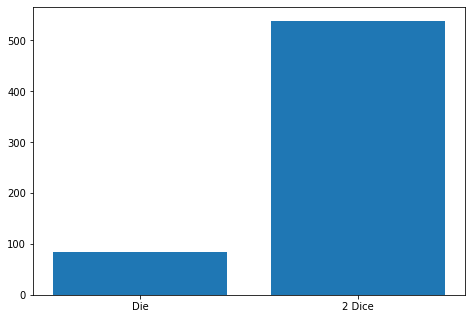

In [40]:
# try some plots

# Create figure and subplot

# Plot the decision between two and one dice 
# when such decision is possible

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

langs = ['Die', '2 Dice']
count_d = np.array([count_1d, count789])

ax.bar(langs,count_d)

plt.show()

# The games rules state that until 7,8,9 the player has to throw 2 dice. After the 7,8,9 box pieces are filled
# the player can decide whether to throw a die or two dice. It can be seen here that in this case almost twice 
# as much times throwing 1 die is prefered. Therefore, a strategy to try is throwing 1 die the moment 7,8,9 are
# box pieces are filled.

In [41]:
# find most popular action for each sum

# function that @returns numbers of occurrences
# for a @param action_str the action string

def a_count(a_str):
    sum12_in = np.where(actions == a_str)
    #all states 
    sta_sum12 = states[sum12_in][:,0]
    c_sta = sta_sum12.shape[0]
    return c_sta

#sum=12
a_str = "c1245"
print('times 1245 action was chosen:', a_count(a_str))

a_str = "c1236"
print('times c1236 action was chosen:', a_count(a_str))

a_str = "c345"
print('times 345 action was chosen:', a_count(a_str))

a_str = "c246"
print('times 246 action was chosen:', a_count(a_str))

a_str = "c237"
print('times 237 action was chosen:', a_count(a_str))

a_str = "c156"
print('times 156 action was chosen:', a_count(a_str))

a_str = "c147"
print('times 147 action was chosen:', a_count(a_str))

a_str = "c138"
print('times 138 action was chosen:', a_count(a_str))

a_str = "c129"
print('times 129 action was chosen:', a_count(a_str))

a_str = "c57"
print('times c57 action was chosen:', a_count(a_str))

a_str = "c48"
print('times c48 action was chosen:', a_count(a_str))

a_str = "c39"
print('times c39 action was chosen:', a_count(a_str))

times 1245 action was chosen: 1
times c1236 action was chosen: 1
times 345 action was chosen: 8
times 246 action was chosen: 13
times 237 action was chosen: 8
times 156 action was chosen: 11
times 147 action was chosen: 8
times 138 action was chosen: 12
times 129 action was chosen: 16
times c57 action was chosen: 82
times c48 action was chosen: 93
times c39 action was chosen: 120


In [42]:
#sum11
a_str = "c1235"
print('times c1235 action was chosen:', a_count(a_str))

a_str = "c245"
print('times c245 action was chosen:', a_count(a_str))

a_str = "c236"
print('times c236 action was chosen:', a_count(a_str))

a_str = "c146"
print('times c146 action was chosen:', a_count(a_str))

a_str = "c137"
print('times c137 action was chosen:', a_count(a_str))

a_str = "c128"
print('times c128 action was chosen:', a_count(a_str))

a_str = "c56"
print('times c56 action was chosen:', a_count(a_str))

a_str = "c47"
print('times c47 action was chosen:', a_count(a_str))

a_str = "c38"
print('times c38 action was chosen:', a_count(a_str))

a_str = "c29"
print('times c29 action was chosen:', a_count(a_str))

times c1235 action was chosen: 1
times c245 action was chosen: 6
times c236 action was chosen: 5
times c146 action was chosen: 8
times c137 action was chosen: 8
times c128 action was chosen: 8
times c56 action was chosen: 73
times c47 action was chosen: 65
times c38 action was chosen: 91
times c29 action was chosen: 120


In [43]:
#sum10
a_str = "c1234"
print('times c1234 action was chosen:', a_count(a_str))

a_str = "c145"
print('times c145 action was chosen:', a_count(a_str))

a_str = "c136"
print('times c136 action was chosen:', a_count(a_str))

a_str = "c127"
print('times c127 action was chosen:', a_count(a_str))

a_str = "c235"
print('times c235 action was chosen:', a_count(a_str))

a_str = "c46"
print('times c46 action was chosen:', a_count(a_str))

a_str = "c37"
print('times c37 action was chosen:', a_count(a_str))

a_str = "c28"
print('times c28 action was chosen:', a_count(a_str))

a_str = "c19"
print('times c19 action was chosen:', a_count(a_str))

times c1234 action was chosen: 1
times c145 action was chosen: 9
times c136 action was chosen: 5
times c127 action was chosen: 5
times c235 action was chosen: 8
times c46 action was chosen: 72
times c37 action was chosen: 70
times c28 action was chosen: 90
times c19 action was chosen: 117


In [44]:
#sum9
a_str = "c234"
print('times c234 action was chosen:', a_count(a_str))

a_str = "c135"
print('times c135 action was chosen:', a_count(a_str))

a_str = "c126"
print('times c126 action was chosen:', a_count(a_str))

a_str = "c45"
print('times c45 action was chosen:', a_count(a_str))

a_str = "c36"
print('times c36 action was chosen:', a_count(a_str))

a_str = "c27"
print('times c27 action was chosen:', a_count(a_str))

a_str = "c18"
print('times c18 action was chosen:', a_count(a_str))

a_str = "c9"
print('times c9 action was chosen:', a_count(a_str))

times c234 action was chosen: 3
times c135 action was chosen: 3
times c126 action was chosen: 3
times c45 action was chosen: 40
times c36 action was chosen: 36
times c27 action was chosen: 39
times c18 action was chosen: 60
times c9 action was chosen: 255


In [45]:
#sum8
a_str = "c134"
print('times c134 action was chosen:', a_count(a_str))

a_str = "c125"
print('times c125 action was chosen:', a_count(a_str))

a_str = "c35"
print('times c35 action was chosen:', a_count(a_str))

a_str = "c17"
print('times c17 action was chosen:', a_count(a_str))

a_str = "c26"
print('times c26 action was chosen:', a_count(a_str))

a_str = "c8"
print('times c8 action was chosen:', a_count(a_str))

times c134 action was chosen: 6
times c125 action was chosen: 4
times c35 action was chosen: 53
times c17 action was chosen: 49
times c26 action was chosen: 46
times c8 action was chosen: 255


In [46]:
#sum7
a_str = "c124"
print('times c124 action was chosen:', a_count(a_str))

a_str = "c34"
print('times c34 action was chosen:', a_count(a_str))

a_str = "c16"
print('times c16 action was chosen:', a_count(a_str))

a_str = "c25"
print('times c25 action was chosen:', a_count(a_str))

a_str = "c7"
print('times c26 action was chosen:', a_count(a_str))

times c124 action was chosen: 4
times c34 action was chosen: 55
times c16 action was chosen: 48
times c25 action was chosen: 45
times c26 action was chosen: 255


In [47]:
#sum6 coulld be 1/2 die/dice
a_str = "c123"
print('times c123 action was chosen:', a_count(a_str))

a_str = "c24"
print('times c24 action was chosen:', a_count(a_str))

a_str = "c15"
print('times c15 action was chosen:', a_count(a_str))

a_str = "c6"
print('times c6 action was chosen:', a_count(a_str))

times c123 action was chosen: 8
times c24 action was chosen: 56
times c15 action was chosen: 56
times c6 action was chosen: 255


In [48]:
#sum5 coulld be 1/2 die/dice
a_str = "c23"
print('times c23 action was chosen:', a_count(a_str))

a_str = "c14"
print('times c14 action was chosen:', a_count(a_str))

a_str = "c5"
print('times c5 action was chosen:', a_count(a_str))

times c23 action was chosen: 58
times c14 action was chosen: 54
times c5 action was chosen: 255


In [49]:
#sum4 coulld be 1/2 die/dice
a_str = "c13"
print('times c13 action was chosen:', a_count(a_str))

a_str = "c4"
print('times c4 action was chosen:', a_count(a_str))

times c13 action was chosen: 64
times c4 action was chosen: 255


In [50]:
#sum3 coulld be 1/2 die/dice
a_str = "c12"
print('times c12 action was chosen:', a_count(a_str))

a_str = "c3"
print('times c3 action was chosen:', a_count(a_str))

times c12 action was chosen: 64
times c3 action was chosen: 255


In [51]:
#sum2 coulld be 1/2 die/dice
a_str = "c2"
print('times c2 action was chosen:', a_count(a_str))

times c2 action was chosen: 255


In [52]:
#sum1 coulld be 1/2 die/dice
a_str = "c1"
print('times c1 action was chosen:', a_count(a_str))

times c1 action was chosen: 32
